In [44]:
import pandas as pd
df = pd.read_csv('diabetes.csv.xls')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [45]:
#check missing value
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB



Persebaran data sebelum ditangani Outlier: 
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.0

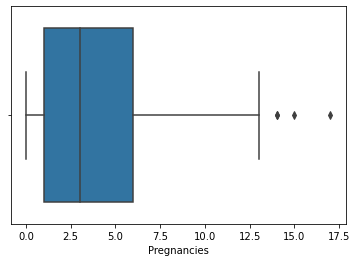

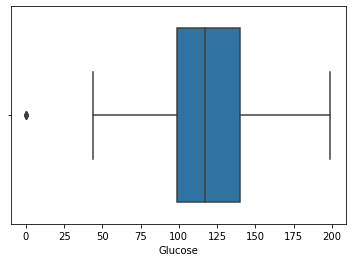

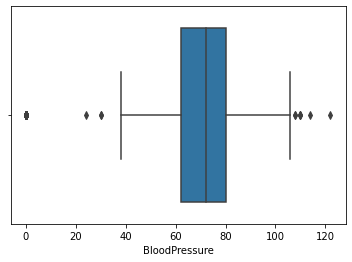

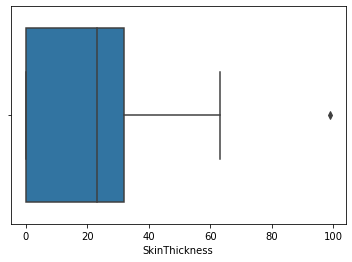

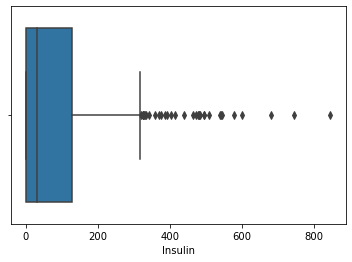

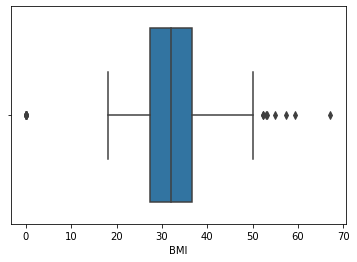

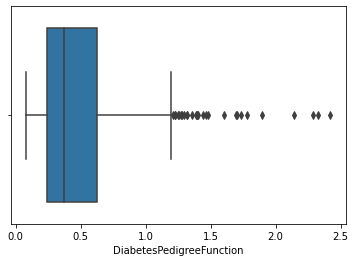

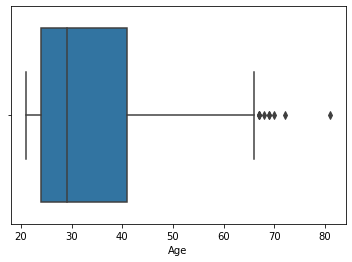

In [47]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(df[['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction', 'Age']].describe())
# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns
# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['Pregnancies'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['Glucose'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['BloodPressure'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['SkinThickness'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['Insulin'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['BMI'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['Age'])
plt.show()

In [48]:
#handling outlier
# Handling with IQR
Q1 = (df[['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction', 'Age']]).quantile(0.25)
Q3 = (df[['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction', 'Age']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (df > maximum)
lower_than = (df < minimum)
df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(df[['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction', 'Age']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
Pregnancies                  13.500
Glucose                     202.125
BloodPressure               107.000
SkinThickness                80.000
Insulin                     318.125
BMI                          50.550
DiabetesPedigreeFunction      1.200
Age                          66.500
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
Pregnancies                  -6.500
Glucose                      37.125
BloodPressure                35.000
SkinThickness               -48.000
Insulin                    -190.875
BMI                          13.350
DiabetesPedigreeFunction     -0.330
Age                          -1.500
dtype: float64

Persebaran data setelah ditangani Outlier: 
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.837240  121.136230      70.684896      20.511719   73.652669   
std       3.344157

C:\Users\USER\AppData\Local\Temp\ipykernel_19432\2671112843.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (df > maximum)
C:\Users\USER\AppData\Local\Temp\ipykernel_19432\2671112843.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (df < minimum)
C:\Users\USER\AppData\Local\Temp\ipykernel_19432\2671112843.py:15: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  df = df.mask(lower_than, minimum, axis=1)


In [49]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

D:\SEMESTER 5\ZENIUS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

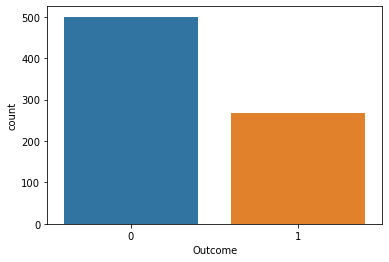

In [50]:
import seaborn as sns
sns.countplot(df['Outcome'])

In [51]:
# Find correlations with the target and sort
correlations = df.corr()['Outcome'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(8))
print('\nMost Negative Correlations:\n', correlations.head(8))

Most Positive Correlations:
 BloodPressure               0.113301
Insulin                     0.124721
DiabetesPedigreeFunction    0.184969
Pregnancies                 0.220392
Age                         0.242702
BMI                         0.309739
Glucose                     0.479158
Outcome                     1.000000
Name: Outcome, dtype: float64

Most Negative Correlations:
 SkinThickness               0.073125
BloodPressure               0.113301
Insulin                     0.124721
DiabetesPedigreeFunction    0.184969
Pregnancies                 0.220392
Age                         0.242702
BMI                         0.309739
Glucose                     0.479158
Name: Outcome, dtype: float64


In [52]:
#handling imbalance
from sklearn.utils import resample

df_outcome = df['Outcome']
df_majority = df[(df_outcome == 0)]
df_minority = df[(df_outcome == 1)]

#df_majority_undersampled = resample(df_majority,
 #                                   replace = True,
  #                                  n_samples = 268,
   #                                 random_state = 1)
#df_resampled = pd.concat([df_majority_undersampled, df_minority])
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                replace = True,
                                n_samples = 500,
                                random_state = 1)
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [53]:
#X0 = df.loc[:, df.columns != 'Outcome']
#y0 = df['Outcome']

In [54]:
#trial handling imbalance
#from imblearn.over_sampling import RandomOverSampler
# apply random over-sampling
#ros = RandomOverSampler(random_state=42)
#X, y = ros.fit_resample(X0, y0)
#print("Class distribution after oversampling:")
#print("Class 0: ", sum(y == 0))
#print("Class 1: ", sum(y == 1))


D:\SEMESTER 5\ZENIUS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


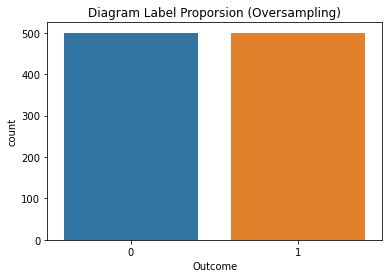

In [55]:
import matplotlib.pyplot as plt
sns.countplot(df_upsampled['Outcome'])
plt.title('Diagram Label Proporsion (Oversampling)')
plt.show() 

In [56]:
df_upsampled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
100,1.0,163.0,72,0,0.0,39.0,1.200,33.0,1
683,4.0,125.0,80,0,0.0,32.3,0.536,27.0,1
197,3.0,107.0,62,13,48.0,22.9,0.678,23.0,1
740,11.0,120.0,80,37,150.0,42.3,0.785,48.0,1
588,3.0,176.0,86,27,156.0,33.3,1.154,52.0,1


In [57]:
# defining feature matrix and response vector (after resampling)
X = df_upsampled.loc[:, df_upsampled.columns != 'Outcome']
y = df_upsampled['Outcome']

In [58]:
# normalisasi data --> ngebantu reduce outlier
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the data
X = scaler.fit_transform(X)

In [59]:
# splitting X and y into training and testing sets (pake proporsi 70 30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 8) (300, 8) (700,) (300,)


Modeling

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter = 2000)
lr = lr.fit(X_train, y_train)
print('Model Logistic Regression: \n', lr)

Model Logistic Regression: 
 LogisticRegression(max_iter=2000)


In [61]:
#evaluate pilihan agak simple outputnya
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test)
y_lr_proba= lr.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.73


In [62]:
# predict
from sklearn.metrics import confusion_matrix, classification_report
y_test_pred = lr.predict(X_test)
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_test, y_test_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       151
           1       0.73      0.72      0.73       149

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



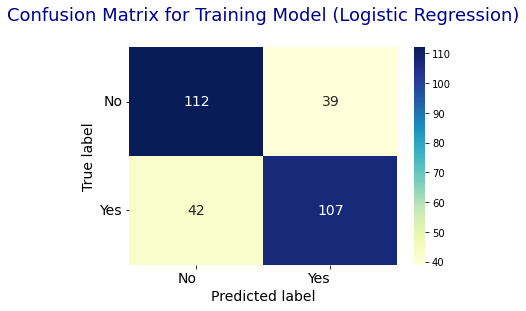

In [63]:
confusion_matrix_app = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No', 'Yes'), ('No', 'Yes'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_app, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model (Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [85]:
# using decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
y_dt_test = dt.predict(X_test)
y_dt_proba= dt.predict_proba(X_test)

In [86]:
print(classification_report(y_test, y_dt_test))
print(confusion_matrix(y_test, y_dt_test))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       151
           1       0.78      0.87      0.82       149

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300

[[115  36]
 [ 20 129]]


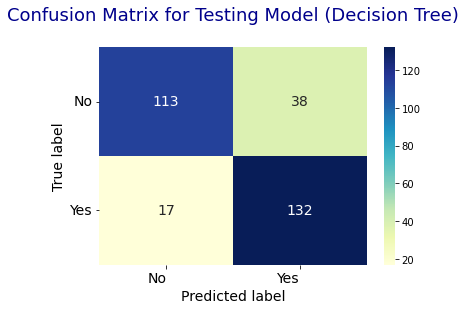

In [66]:
confusion_matrix_app = pd.DataFrame((confusion_matrix(y_test, y_dt_test)), ('No', 'Yes'), ('No', 'Yes'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_app, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model (Decision Tree)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [67]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state= 42,
                            n_jobs = -1,
                            max_depth = 5,
                            n_estimators = 100,
                            oob_score = True)
rf = rf.fit(X_train, y_train)
y_rf_test = rf.predict(X_test)
y_rf_proba= rf.predict_proba(X_test)
print(rf)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)


In [68]:
print(classification_report(y_test, y_rf_test))
print(confusion_matrix(y_test, y_rf_test))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       151
           1       0.78      0.89      0.83       149

    accuracy                           0.82       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300

[[113  38]
 [ 16 133]]


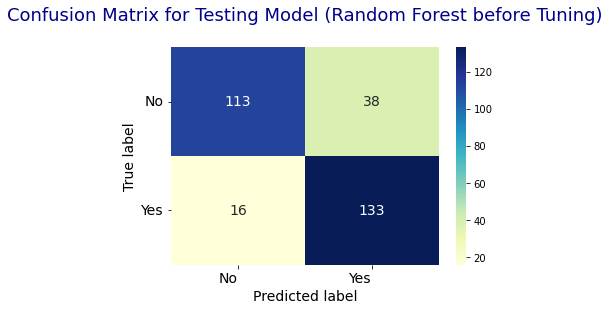

In [69]:
confusion_matrix_app = pd.DataFrame((confusion_matrix(y_test, y_rf_test)), ('No', 'Yes'), ('No', 'Yes'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_app, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model (Random Forest before Tuning)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [70]:
rf_a = RandomForestClassifier(random_state= 42,
                              n_jobs = -1,
                              oob_score = True)

In [71]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [10,25,30,50,100],
    'max_features': ['auto']
}

In [72]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = rf_a,
                           param_grid = params,
                           cv = 4, n_jobs = -1, 
                           verbose = 1, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 125 candidates, totalling 500 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'max_features': ['auto'],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 30, 50, 100]},
             scoring='accuracy', verbose=1)

In [73]:
grid_search.best_score_

0.812857142857143

In [74]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       oob_score=True, random_state=42)

In [75]:
RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       oob_score=True, random_state=42)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       oob_score=True, random_state=42)

In [76]:
y_rfa = rf_best.predict(X_train)
y_rf_best = rf_best.predict(X_test)
y_rf_best_proba= rf_best.predict_proba(X_test)

In [77]:
print(classification_report(y_test, y_rf_best))
print(confusion_matrix(y_test, y_rf_best))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80       151
           1       0.77      0.89      0.83       149

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

[[112  39]
 [ 16 133]]


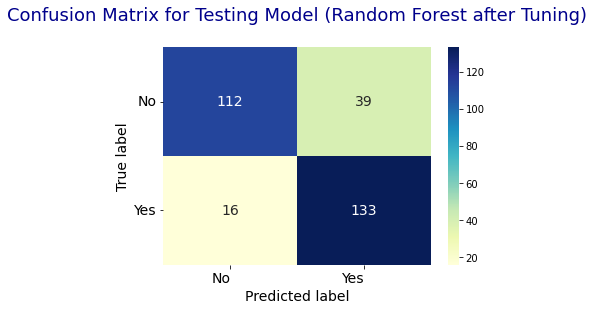

In [78]:
confusion_matrix_app = pd.DataFrame((confusion_matrix(y_test, y_rf_best)), ('No', 'Yes'), ('No', 'Yes'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_app, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model (Random Forest after Tuning)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

In [79]:
from sklearn.svm import SVC
# Train the model
svm = SVC()
svm.fit(X_train, y_train)
# Evaluate the model
y_svm_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_svm_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7633333333333333


coba roc curve

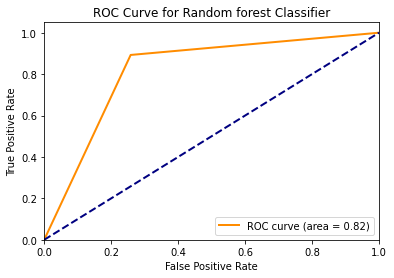

In [80]:
from sklearn.metrics import roc_curve, auc
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_rf_best)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random forest Classifier')
plt.legend(loc="lower right")
plt.show()

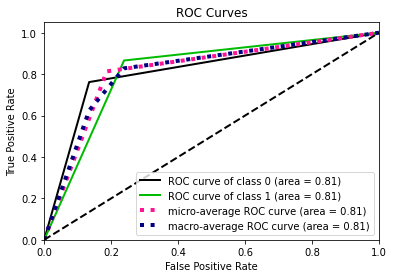

In [87]:
import scikitplot as skplt 
plot= skplt.metrics.plot_roc(y_test, y_dt_proba)
# plt.title('ROC-Curves-Random Forest Classifier After Tunning')

ROC AUC: 0.8877727899017736


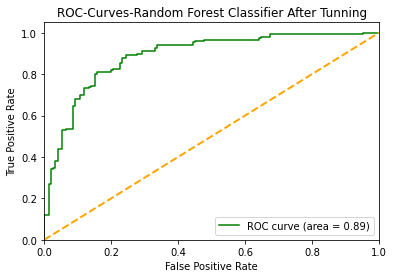

In [82]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

y_rf_proba = rf.predict_proba(X_test)[:, 1]
y_dt_proba=dt.predict_proba(X_test)[:, 1]
y_lr_proba= lr.predict_proba(X_test)[:,1]
y_rf_best_proba=rf_best.predict_proba(X_test)[:,1]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_rf_best_proba)
roc_auc = roc_auc_score(y_test, y_rf_best_proba)
print('ROC AUC:', roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr, color='green',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curves-Random Forest Classifier After Tunning')
plt.legend(loc="lower right")
plt.show()




```
It is possible that the ROC curve and the accuracy have different values if the classification threshold used for computing the accuracy and the predicted probabilities is different.

By default, the predict() method of a classifier in scikit-learn returns the class labels of the test instances. In contrast, the predict_proba() method returns the predicted probabilities of each class label for the test instances.

When computing the accuracy, scikit-learn uses a default threshold of 0.5 to convert the predicted probabilities to class labels. However, this threshold can be changed using the threshold parameter of the predict() method. On the other hand, when plotting the ROC curve, scikit-learn considers all possible threshold values between 0 and 1 to compute the true positive rate and false positive rate for each threshold.

Therefore, if the threshold used to compute the accuracy is different from the threshold used to compute the predicted probabilities, then the accuracy and the ROC curve can have different values. To ensure consistency between the two metrics, you can set the same threshold for both calculations.
```



In [83]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.interpolate import UnivariateSpline
# from sklearn.metrics import RocCurveDisplay, roc_curve, auc, roc_auc_score
# from sklearn.linear_model import LogisticRegression

# # compute the fpr, tpr, and threshold values for the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_rf_proba)
# # compute the AUC score
# roc_auc = roc_auc_score(y_test, y_rf_proba)
# # create a smoothing spline for the ROC curve
# roc_spline = UnivariateSpline(fpr, tpr)
# # create a range of fpr values to evaluate the smoothing spline
# fpr_smooth = np.linspace(0, 1, 100)
# # evaluate the smoothing spline at the range of fpr values
# tpr_smooth = roc_spline(fpr_smooth)
# # plot the smoothed ROC curve
# plt.plot(fpr_smooth, tpr_smooth, label='Smoothed ROC Curve')
# # plot the original ROC curve for comparison
# RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='RF').plot()
# # add labels and legend
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend()
# plt.show()



In [84]:
import numpy as np
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

#coba pake random forest\a
prediction = rf.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[0.37037037 0.796139   0.51388889 0.2375     0.55009823 0.33467742
  0.45365419 0.65934066]]
[1]
The person is diabetic


D:\SEMESTER 5\ZENIUS\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
